# DSCI 503 – Project 03

### Anthony Appiani 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
Loading and exploring the data

In [2]:
diamonds = pd.read_table('diamonds.txt', sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Determine the size of the diamonds dataset

In [3]:
diamonds.shape

(53940, 10)

Inspecting the distribution of the columns in the diamonds dataset

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
Viewing the 5 most expensive diamonds in the dataset

In [5]:
diamonds.loc[:,['price','carat','cut','color', 'clarity']].sort_values(by='price', ascending = False).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


Viewing the 5 least expensive diamonds

In [6]:
diamonds.loc[:,['price','carat','cut','color', 'clarity']].sort_values(by='price', ascending = True).head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


Viewing the 5 largest diamonds with ideal cut

In [7]:
ideal = diamonds.loc[:,'cut'] == 'Ideal'
diamonds.loc[ideal,['price','carat','cut','color', 'clarity']].sort_values(by='carat', ascending = False).head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


View the 5 largest diamonds with fair cut

In [8]:
fair = diamonds.loc[:,'cut'] == 'Fair'
diamonds.loc[fair,['price','carat','cut','color', 'clarity']].sort_values(by='carat', ascending = False).head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables

create lists to specify the order for each of the three categorical variables (cut,color,clarity)

In [9]:
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

Use these lists to communicate to Pandas the correct order for the levels of the three categorical variables. use pd.Categorical()

In [10]:
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.color = pd.Categorical(diamonds.color, color_levels)

create lists of named colors to serve as palettes to be used for visualizations later in the notebook

In [11]:
clarity_pal = ['lightcoral','sienna','orange', 'olivedrab', 'lime','navy','fuchsia','steelblue']
cut_pal = ['gold','blue','red','plum','greenyellow']
color_pal = ['peru','palegreen','darkgreen','cyan','purple','red','navy']

## Part 4: Displaying Counts for Categorical Variables

Counting the number of diamonds for each level of cut

In [12]:
diamonds.cut.value_counts().sort_index()

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

Counting the number of diamonds for each level of color

In [13]:
diamonds.color.value_counts().sort_index()

color
J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: count, dtype: int64

Counting the number of diamonds for each level of clarity

In [14]:
diamonds.clarity.value_counts().sort_index()

clarity
I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: count, dtype: int64

## Part 5: Scatterplots of Price Against Carat

Create a scatterplot of price against carat

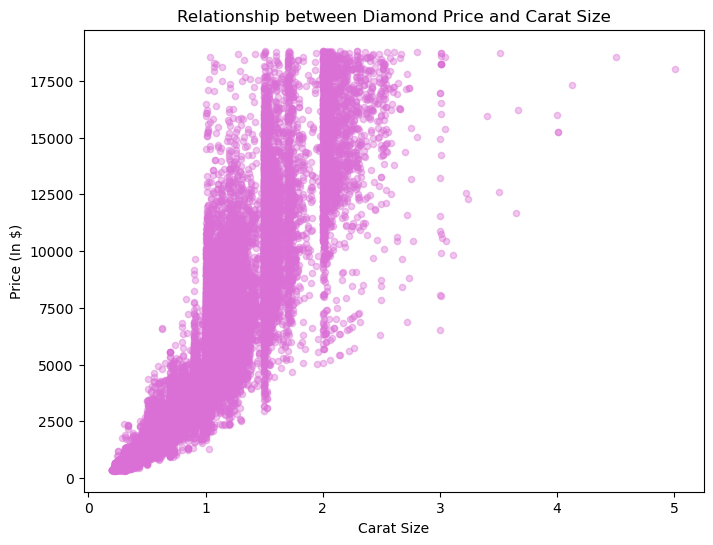

In [15]:
plt.figure(figsize = [8,6])
plt.scatter(x = diamonds.loc[:,'carat'], y = diamonds.loc[:,'price'], s= 20, alpha = .4, color = 'orchid')
plt.xlabel('Carat Size')
plt.ylabel('Price (In $)')
plt.title('Relationship between Diamond Price and Carat Size')

plt.show()

Reproduce the plot from above, but will now color the points according to their clarity

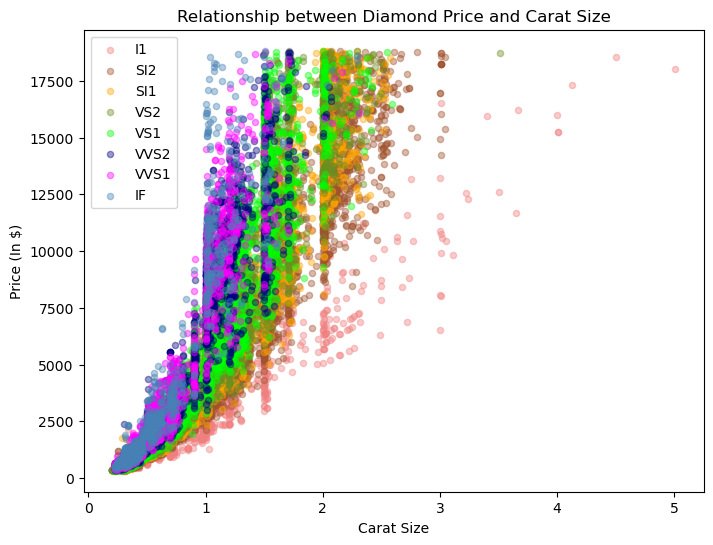

In [16]:
plt.figure(figsize = [8,6])
for c in range(0,len(clarity_levels)):
    clarity = diamonds.loc[:,'clarity'] == clarity_levels[c] 
    plt.scatter(x = diamonds.loc[clarity,'carat'], y = diamonds.loc[clarity,'price'], s= 20, alpha = .4,label = clarity_levels[c], color = clarity_pal[c])

plt.xlabel('Carat Size')
plt.ylabel('Price (In $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.legend()
plt.show()

Creating Subplots for each clarity level by color 

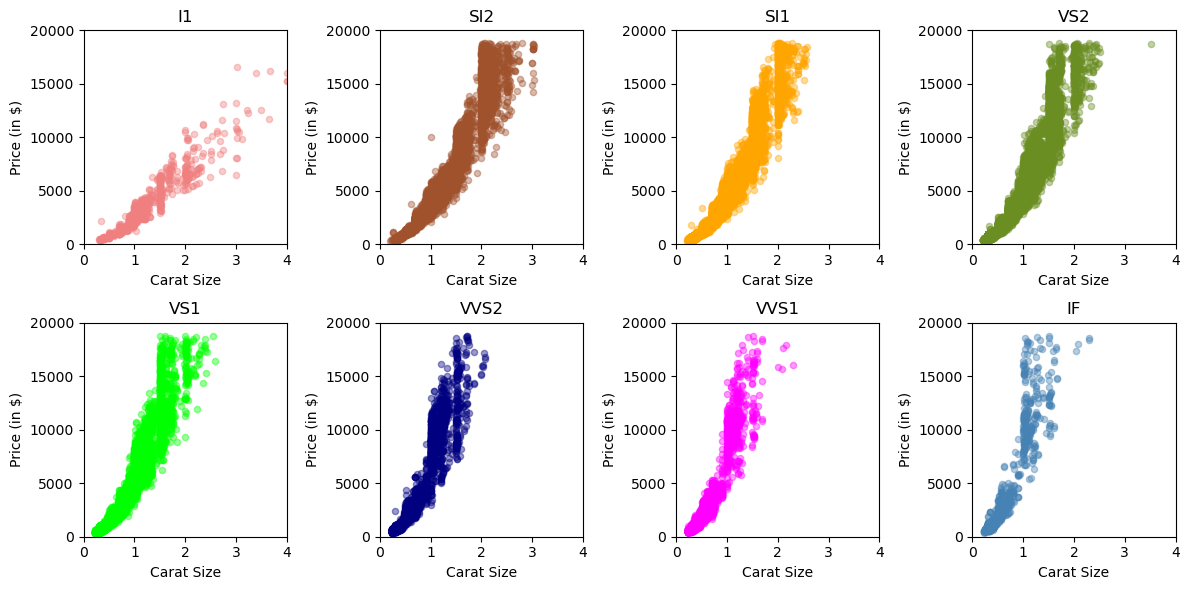

In [17]:
fig = plt.figure(figsize= [12,6])

for i in range(0,len(clarity_levels)):
    clarity = diamonds.loc[:,'clarity'] == clarity_levels[i]
    
    plt.subplot(2,4,i+1)
    
    plt.scatter(x = diamonds.loc[clarity,'carat'], y = diamonds.loc[clarity,'price'], s = 20, alpha = .4, color = clarity_pal[i], label = clarity_levels[i])
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.title(clarity_levels[i])
    plt.xlim([0,4])
    plt.ylim([0,20000])
    


plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations

Adding two new columns to diamonds 

In [18]:
diamonds.loc[:,'ln_carat'] = np.log(diamonds.loc[:,'carat'])
diamonds.loc[:,'ln_price'] = np.log(diamonds.loc[:,'price'])

Create histograms to explore the distribution of diamond prices and the log of diamond prices

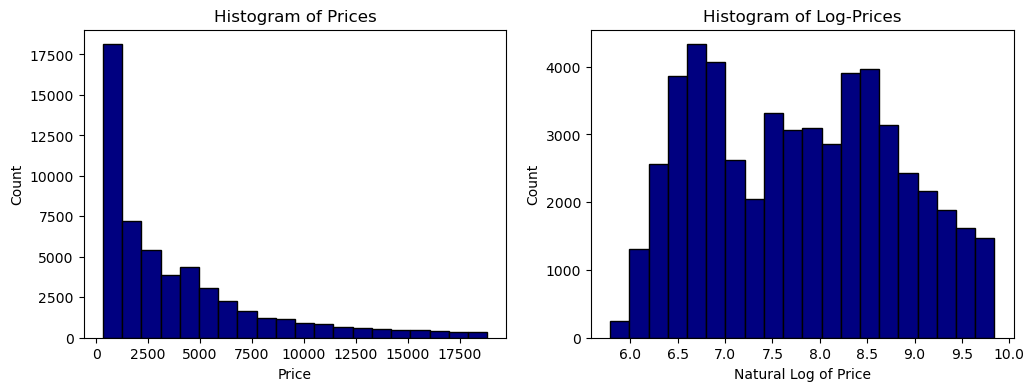

In [19]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.hist(diamonds.loc[:,'price'], edgecolor='black', color='navy', bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Prices')


plt.subplot(1,2,2)
plt.hist(diamonds.loc[:,'ln_price'], edgecolor = 'black', color = 'navy', bins =20)
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
plt.title('Histogram of Log-Prices')

plt.show()

Create histrograms to explore the distribution of carat sizes and the log of carat sizes

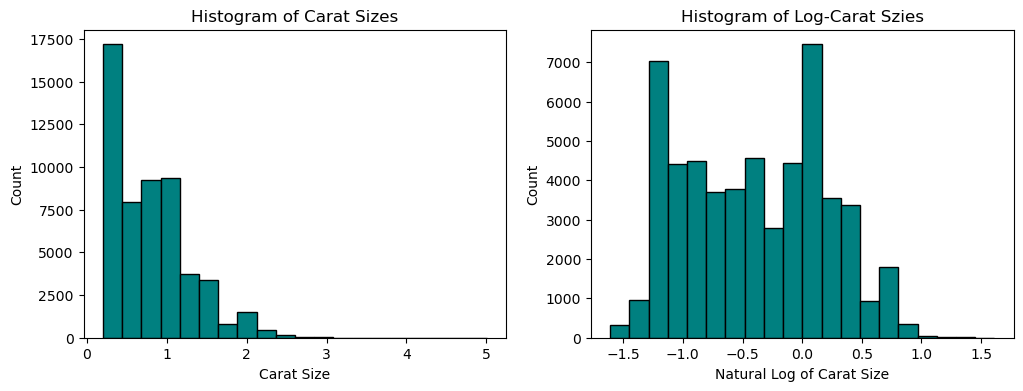

In [20]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.hist(diamonds.loc[:,'carat'], edgecolor='black', color='teal', bins=20)
plt.xlabel('Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Carat Sizes')


plt.subplot(1,2,2)
plt.hist(diamonds.loc[:,'ln_carat'], edgecolor ='black', color ='teal', bins =20)
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Log-Carat Szies')

plt.show()

## Part 7: Scatterplot of Transformed Variables

create a scatterplot of ln_price against ln_carat, with points colored according to their clarity

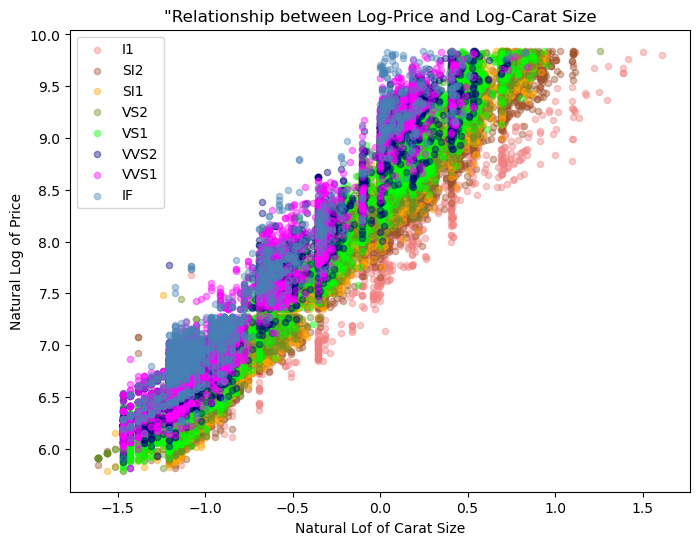

In [21]:
plt.figure(figsize = [8,6])
for c in range(0,len(clarity_levels)):
    clarity = diamonds.loc[:,'clarity'] == clarity_levels[c] 
    plt.scatter(x = diamonds.loc[clarity,'ln_carat'], y = diamonds.loc[clarity,'ln_price'], s= 20, alpha = .4,label = clarity_levels[c], color = clarity_pal[c])

plt.xlabel('Natural Lof of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('"Relationship between Log-Price and Log-Carat Size')
plt.legend()
plt.show()

## Part 8: Grouping by Cut

Create a grouped DataFrame displaying the mean price and carat size for each cut

In [22]:
gb_cut = diamonds.loc[:,['cut','price','carat']].groupby('cut').mean()
gb_cut

,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


Using bar charts to graphically display the information from the DataFrame above

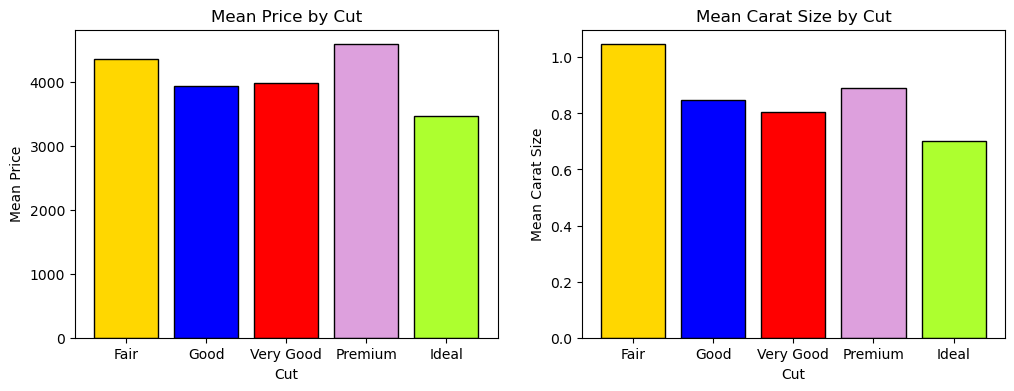

In [23]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.bar(gb_cut.index, gb_cut.loc[:,'price'], edgecolor='black', color = cut_pal)
plt.xlabel('Cut')
plt.ylabel('Mean Price')
plt.title('Mean Price by Cut')

plt.subplot(1,2,2)
plt.bar(gb_cut.index, gb_cut.loc[:,'carat'], edgecolor='black', color = cut_pal)
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Cut')

plt.show()

## Part 9: Grouping by Color

Create a grouped DataFramedisplaying the mean price adn carat size for each color level 

In [24]:
gb_color = diamonds.loc[:,['color','price','carat']].groupby('color').mean()
gb_color

,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


Using bar charts to graphically display the information from the DataFrame above

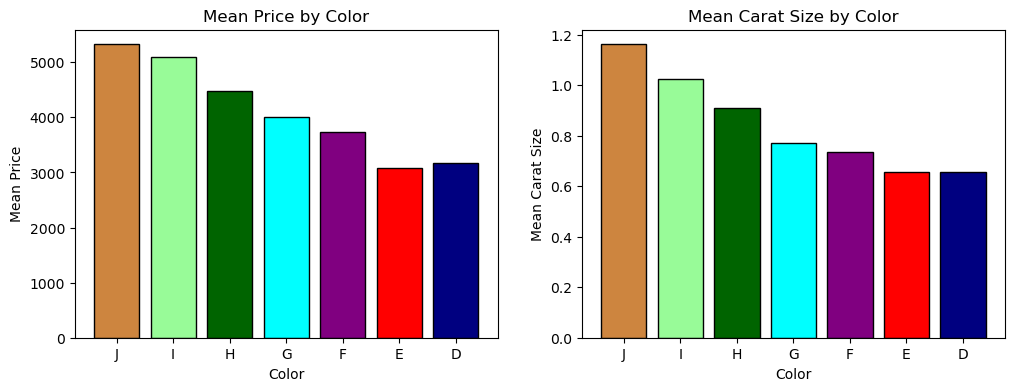

In [25]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.bar(gb_color.index, gb_color.loc[:,'price'],edgecolor='black',color=color_pal)
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Color')

plt.subplot(1,2,2)
plt.bar(gb_color.index, gb_color.loc[:,'carat'], edgecolor='black',color = color_pal)
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Color')

plt.show()

## Part 10: Grouping by Clarity

Create a grouped DataFrame displaying the mean price and carat size for each clarity level.

In [26]:
gb_clarity = diamonds.loc[:,['clarity','price','carat']].groupby('clarity').mean()
gb_clarity

,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


Use bar charts to graphically display the information from the DataFrame above.

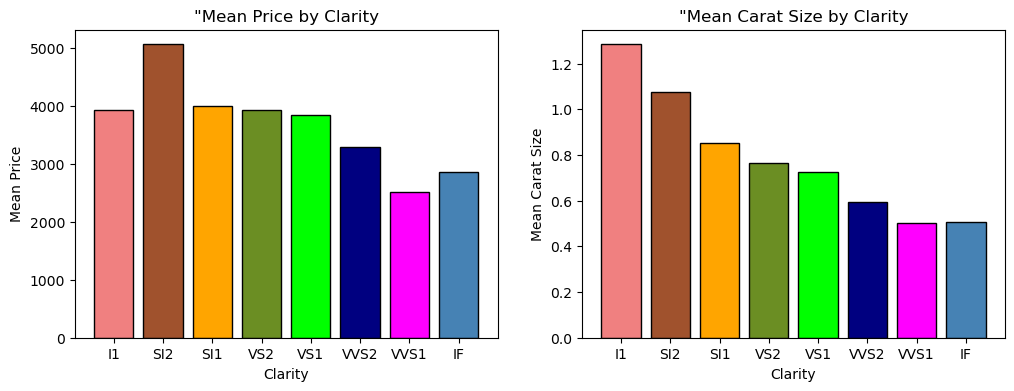

In [27]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.bar(gb_clarity.index,gb_clarity.loc[:,'price'], edgecolor ='black',color = clarity_pal)
plt.xlabel('Clarity')
plt.ylabel('Mean Price')
plt.title('"Mean Price by Clarity')

plt.subplot(1,2,2)
plt.bar(gb_clarity.index,gb_clarity.loc[:,'carat'], edgecolor ='black',color = clarity_pal)
plt.xlabel('Clarity')
plt.ylabel('Mean Carat Size')
plt.title('"Mean Carat Size by Clarity')

plt.show()